In [1]:
!pip install requests pandas


In [29]:
import requests
import pandas as pd
from datetime import datetime


In [30]:
cities = ['Hyderabad', 'Darjeeling', 'Delhi', 'Mumbai', 'Chennai', 'Bangalore']


In [31]:
weather_data = []

for city in cities:
    try:
        url = f'https://wttr.in/{city}?format=j1'
        response = requests.get(url)
        data = response.json()

        current = data['current_condition'][0]

        weather_data.append({
            'City': city,
            'Temperature (°C)': current['temp_C'],
            'Feels Like (°C)': current['FeelsLikeC'],
            'Humidity (%)': current['humidity'],
            'Wind Speed (kmph)': current['windspeedKmph'],
            'Condition': current['weatherDesc'][0]['value'],
            'Time': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        })

    except Exception as e:
        print(f"Error fetching data for {city}: {e}")


In [32]:
df = pd.DataFrame(weather_data)
df


,City,Temperature (°C),Feels Like (°C),Humidity (%),Wind Speed (kmph),Condition,Time
0,Hyderabad,26,28,74,30,Haze,2025-06-22 15:49:32
1,Darjeeling,33,41,60,4,Light rain shower,2025-06-22 15:49:34
2,Delhi,33,36,67,6,Haze,2025-06-22 15:49:36
3,Mumbai,29,35,79,27,"Mist, rain shower",2025-06-22 15:49:38
4,Chennai,34,38,60,10,Partly cloudy,2025-06-22 15:49:39
5,Bangalore,26,28,74,29,Partly cloudy,2025-06-22 15:49:41


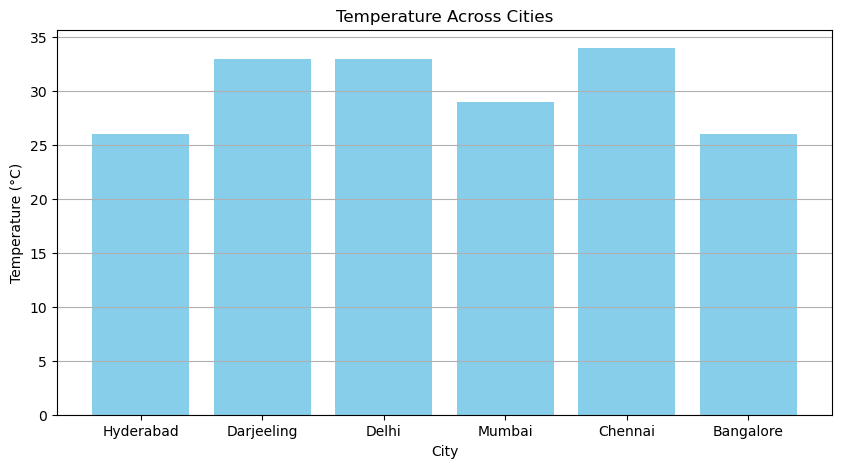

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(df['City'], df['Temperature (°C)'].astype(int), color='skyblue')
plt.title("Temperature Across Cities")
plt.xlabel("City")
plt.ylabel("Temperature (°C)")
plt.grid(axis='y')
plt.show()


In [34]:
def status(temp):
    temp = int(temp)
    if temp >= 35:
        return "🔥 Hot"
    elif temp >= 25:
        return "🌤️ Warm"
    elif temp >= 15:
        return "☁️ Mild"
    else:
        return "❄️ Cold"

df['Status'] = df['Temperature (°C)'].apply(status)


In [35]:
df_sorted = df.sort_values(by='Temperature (°C)', ascending=False)
df_sorted


,City,Temperature (°C),Feels Like (°C),Humidity (%),Wind Speed (kmph),Condition,Time,Status
4,Chennai,34,38,60,10,Partly cloudy,2025-06-22 15:49:39,🌤️ Warm
1,Darjeeling,33,41,60,4,Light rain shower,2025-06-22 15:49:34,🌤️ Warm
2,Delhi,33,36,67,6,Haze,2025-06-22 15:49:36,🌤️ Warm
3,Mumbai,29,35,79,27,"Mist, rain shower",2025-06-22 15:49:38,🌤️ Warm
0,Hyderabad,26,28,74,30,Haze,2025-06-22 15:49:32,🌤️ Warm
5,Bangalore,26,28,74,29,Partly cloudy,2025-06-22 15:49:41,🌤️ Warm


In [36]:
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
df.to_csv(f"Weather_Log_{timestamp}.csv", index=False)


In [37]:
print("Average Temperature:", df['Temperature (°C)'].astype(int).mean())
print("Highest Humidity:", df.loc[df['Humidity (%)'].astype(int).idxmax()])


Average Temperature: 30.166666666666668
Highest Humidity: City                              Mumbai
Temperature (°C)                      29
Feels Like (°C)                       35
Humidity (%)                          79
Wind Speed (kmph)                     27
Condition              Mist, rain shower
Time                 2025-06-22 15:49:38
Status                           🌤️ Warm
Name: 3, dtype: object


In [2]:
!pip install plotly

import plotly.express as px
fig = px.bar(df, x='City', y='Temperature (°C)', color='Condition', title="City-wise Temperature")
fig.show()


NameError: name 'df' is not defined

## 🌤️ 
- Data scraped using `wttr.in` API
- Includes 6 cities (Hyderabad, Darjeeling, etc.)
- Metrics: Temperature, Humidity, Wind, Condition
- Visualized using Matplotlib / Plotly
- Saved to CSV for historical tracking
